# Linear Regression: Placement Package Prediction

This notebook demonstrates the implementation of **Simple Linear Regression** to predict a student's placement package based on their CGPA.

The objective is to understand the end-to-end machine learning workflow:
- Data loading
- Visualization
- Model training
- Evaluation
- Interpretation


## 1. Problem Statement

The goal of this project is to predict the **placement package (in LPA)** of a student based on their **CGPA** using a simple linear regression model.

Linear Regression is suitable here because we assume a linear relationship between CGPA and salary package.


## 2. Import Required Libraries

We import essential Python libraries for:
- Data handling
- Visualization
- Machine learning


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 3. Load the Dataset

The dataset contains:
- `cgpa` → Student CGPA (independent variable)
- `package` → Placement package in LPA (dependent variable)


In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


## 4. Data Exploration

We explore the dataset to understand:
- Number of rows and columns
- Data types
- Statistical summary


In [21]:
df.shape


(200, 2)

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [23]:
df.describe()


,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


## 5. Data Visualization

We visualize the relationship between CGPA and placement package using a scatter plot.
This helps verify whether a linear relationship exists.


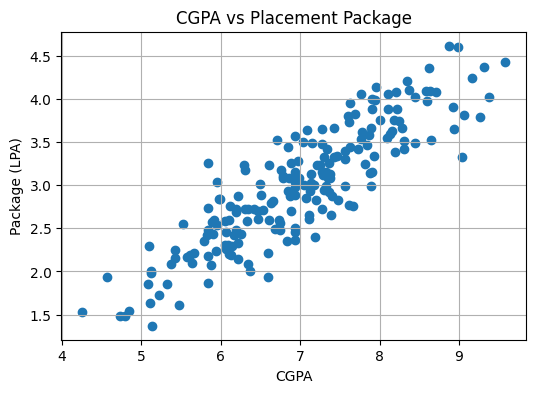

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')
plt.title('CGPA vs Placement Package')
plt.grid(True)
plt.show()


## 6. Feature Selection

- Independent Variable (X): CGPA  
- Dependent Variable (y): Placement Package


In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


## 7. Train-Test Split

The dataset is split into:
- 80% training data
- 20% testing data

This allows us to evaluate the model on unseen data.


In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## 8. Model Training

We train a Linear Regression model using the training data.
The model learns the best-fit line by minimizing prediction error.


In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [12]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


## 9. Predictions

We predict placement packages for the test dataset.


In [27]:
y_pred = lr.predict(X_test)


In [13]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

## 10. Model Evaluation

We evaluate the model using:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- R² Score


In [28]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.2884710931878175
MSE: 0.12129235313495527
R2 Score: 0.780730147510384


## 11. Regression Line Visualization

The regression line represents the predicted values generated by the model.


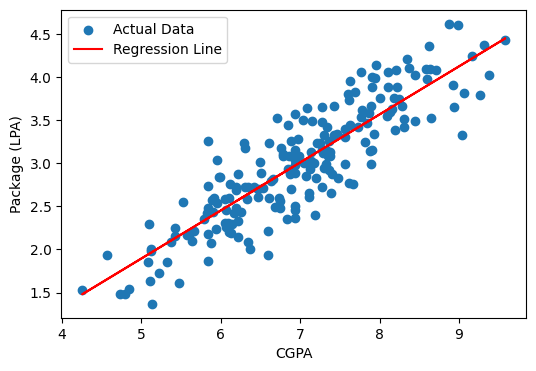

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(df['cgpa'], df['package'], label='Actual Data')
plt.plot(df['cgpa'], lr.predict(X), color='red', label='Regression Line')
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')
plt.legend()
plt.show()


## 12. Model Equation Interpretation

The linear regression equation is:

Package = m × CGPA + b

Where:
- m is the slope
- b is the intercept


In [30]:
m = lr.coef_[0]
b = lr.intercept_

print(f"Model Equation: Package = {m:.2f} * CGPA + {b:.2f}")


Model Equation: Package = 0.56 * CGPA + -0.90


## 13. Sample Prediction

We predict the package for a student with CGPA = 8.5


In [31]:
lr.predict([[8.5]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.84647985])

## 14. Conclusion

This notebook demonstrates the complete implementation of simple linear regression.
The model shows a positive relationship between CGPA and placement package and performs reasonably well on test data.

This project is suitable as:
- A beginner machine learning project
- An academic submission
- A resume or interview discussion example


In [15]:
m = lr.coef_

In [16]:
b = lr.intercept_

In [17]:
# y = mx + b

m * 8.58 + b

array([3.89111601])

In [18]:
m * 9.5 + b

array([4.40443183])

In [19]:
m * 100 + b

array([54.89908542])